# Datenstrukturen und Algorithmen

## Praktische Aufgabe 6

In dieser praktischen Aufgabe werden Sie sich mit maximalen Flüssen beschäftigen. Sie werden einerseits Edmonds-Karp implementieren und andererseits mit Hilfe eines Bipartiten Matchings die Zuordnung von Studenten auf Tutorien zu berechnen. Die Hauptaufgabe beim Bipartiten Matching besteht darin einen Graphen zu konstruieren der alle Anforderungen abbildet. Die Lösung erhält man dann indem man den maximalen Fluss auf diesem Graphen ausrechnet. Sie dürfen in dieser Teilaufgabe das Package `networkx` verwenden, um den maximalen Fluss zu berechnen.

Die Abgaben werden mit der `nbgrader` Erweiterung korrigiert. Das System erwartet, dass der Code zum Lösen der Aufgaben nach der `#YOUR CODE HERE` Anweisung kommt. Außerdem darf die Zellenreihenfolge nicht geändert werden. Damit Sie selbst Ihre Lösungsvorschläge validieren können, werden Ihnen Unittests zur Verfügung gestellt. Beachten Sie das diese Tests keine Garantie sind für das Erreichen der vollen Punktzahl, da Sie nur einen Teil der Funktionalität testen.

Wichtig: Füllen Sie zunächst die erste Zelle mit `#YOUR ANSWER HERE` unter dem Titel `Abgabeteam` mit ihren Namen und Matrikelnummern vollständig aus. Dies ermöglicht uns auch bei technischen Problemen die Abgaben eindeutig zuordnen zu können. Ändern Sie außerdem nicht den Namen der Datei. 

**Übersicht der Aufgaben** (20 Punkte):
1. **Edmonds-Karp** - insgesamt: 10 Punkte
   - breadth_first_search() - 5P.
   - edmonds_karp() - 5P.

2. **Bipartites Matching** - insgesamt: 10 Punkte
   - create_graph() - 6P.
   - extract_assignment() - 4P.

## Abgabeteam
Bitte füllen Sie die untenstehende Zelle aus mit 

Nummer des Tutoriums,

Voranme Nachname Matrikelnummer 1,

Vorname Nachname Matrikelnummer 2,

(Vorname Nachname Matrikelnummer 3)

23,

Mohammed Al-Laktah 419664,

Salah Atallah 414867,

## Module importieren

Zuerst werden die benötigten Module importiert. Sie dürfen keine weiteren Module impotieren.

Wenn in Ihrer Entwickungsumbegung (z.B Google Colab oder Deepnote) bestimmte Module nicht verfügbar sind, dann kommentieren Sie die erste Zeile aus um die Module in der Umgebung zu installieren.

In [73]:
#!pip install nose
from random import randint, sample
from nose.tools import assert_equal
from numpy import array

from networkx import DiGraph, get_edge_attributes
from networkx.algorithms.flow import edmonds_karp
from networkx import draw_networkx, spring_layout
from networkx import draw_networkx_edge_labels, draw_networkx_edges, draw_networkx_nodes

# unittests helper functions
import pickle

def load_data(idx, name):
    with open(f'data/{idx}/{name}.pkl', 'rb') as f:
        return pickle.load(f)

# Edmonds-Karp

In dieser Aufgabe werden Sie in zwei Schritten den Algorithmus von Edmonds-Karp implementieren. Orientieren Sie sich dabei an dem in der Vorlesung vorgestellen Code. 
Die Funktion `visualize_graph` wird zur Verfügung gestellt und erlaubt es Graphen in Matrixdarstellung zu visualisieren. 

In [74]:
def visualize_graph(g, s=None, t=None):
    G = DiGraph(array(g))
    pos = spring_layout(G)
    labels = get_edge_attributes(G, 'weight')

    draw_networkx(G, pos, connectionstyle="arc3,rad=0.1")
    if s is not None:
        draw_networkx_nodes(G, pos, nodelist=[s], node_color="g")
    if t is not None:
        draw_networkx_nodes(G, pos, nodelist=[t], node_color="r")
    draw_networkx_edge_labels(G, pos, edge_labels=labels, label_pos=0.3)

## a) breadth_first_search() - 5P.

Implementieren Sie die Funktion `breadth_first_search()`. Orientieren Sie sich dabei an dem in der Vorlesung vorgestellen Code.
Als Eingabe erhalten Sie einen Graphen `G`, einen Startknoten `s`, einen Zielknoten `t` und deine Liste `parent`. Die Liste `parent` wird später benötigt um die Funktion `edmonds_karp_impl()` zu implementieren. Sie speichert den eindeutigen Vorgänger eines Knotens. 

Folgende Schritte sind zu beachten: 
- Initialisieren Sie eine Liste `visited`, in der Sie speichern ob ein Konten bereits besucht wurde. 
- Initialisieren Sie eine Queue `Q` mit dem ersten Element `s`. 
- die Funktion gibt als Rückgabewert `False` oder `True` zurück, entsprechen ob die Suche erfolgreich war oder nicht. 

In [75]:
def breadth_first_search(G, s, t, parent):
    """ Breadth First Search """
    visited = [False] * len(G)
    queue = [s]
    visited[s] = True
    
    while queue:
        curr = queue.pop(0)
        
        for i, w in enumerate(G[curr]):
            if w and not visited[i]:
                queue.append(i)
                visited[i] = True
                parent[i] = curr

    return visited[t]


## a) Tests

In [76]:
#no edges
s, t = 0, 1
G = [[0, 0],
    [0, 0]]
parent = [-1] * len(G)
assert_equal(False, breadth_first_search(G, s, t, parent))
assert_equal([-1, -1], parent)

In [77]:
#self loop but no other edges
s, t = 0, 1
G = [[1, 0],
    [0, 0]]
parent = [-1] * len(G)
assert_equal(False, breadth_first_search(G, s, t, parent))
assert_equal([-1, -1], parent)

In [78]:
#connection from 0 to 1
s, t = 0, 1
G = [[0, 1],
    [0, 0]]
parent = [-1] * len(G)
assert_equal(True, breadth_first_search(G, s, t, parent))
assert_equal([-1, 0], parent)

In [79]:
#no connection from 1 to 0 but from 0 to 1
s, t = 1, 0
G = [[0, 1],
    [0, 0]]
parent = [-1] * len(G)
assert_equal(False, breadth_first_search(G, s, t, parent))
assert_equal([-1, -1], parent)

In [80]:
#more general case
s, t = 0, 5
G = [
    [0, 16, 13, 0, 0, 0],
    [0, 0, 10, 12, 0, 0],
    [0, 4, 0, 0, 14, 0],
    [0, 0, 9, 0, 0, 20],
    [0, 0, 0, 7, 0, 4],
    [0, 0, 0, 0, 0, 0],
]
parent = [-1] * len(G)
assert_equal(True, breadth_first_search(G, s, t, parent))
assert_equal([-1, 0, 0, 1, 2, 3], parent)

## b) edmonds_karp_impl() - 5P.

Implementieren Sie die Funktion `edmonds_karp_impl()`. Orientieren Sie sich dabei an dem in der Vorlesung vorgestellen Code. Verwenden Sie außerdem die in der Teilaufgabe a) definierte Funktion `breadth_first_search()`. Als Eingabe erhalten Sie einen Graphen `G`, einen Startknoten `s`, einen Zielknoten `t`. Die Funktion `edmonds_karp_impl()` berechnet den maximalen Fluss zwischen dem Startknoten `s` und dem Zielknoten `t`.

Folgende Schritte sind zu beachten: 
- Initialisieren Sie eine Liste `parent` die für jeden Knoten des Graphen den Wert `-1` enthält.
- Initialisieren Sie den Namen `max_flow` mit 0.
- geben Sie den Wert von `max_flow` am Ende der Berechnungen zurück. Geben Sie außerdem die Liste `parent` zurück.

In [81]:
def edmonds_karp_impl(G, s, t):
    """ Returns the maximum flow from s to t for the given graph G. """
    parent = [-1] * len(G)
    max_flow = 0
    
    while breadth_first_search(G, s, t, parent):
        flow = float('inf')
        p = t
        
        while p != s:
            flow = min(flow, G[parent[p]][p])
            p = parent[p]
        max_flow += flow
        
        v = t
        
        while v != s:
            p = parent[v]
            G[p][v] -= flow
            G[v][p] += flow
            v = parent[v]
    
    return max_flow, parent

## b) Tests

In [82]:
s, t = 0, 1
G = [[0, 0],
    [0, 0]]

max_flow, parent = edmonds_karp_impl(G, s, t)

assert_equal(0, max_flow)
assert_equal([-1, -1], parent)

In [83]:
s, t = 0, 1
G = [[0, 1],
    [0, 0]]

max_flow, parent = edmonds_karp_impl(G, s, t)

assert_equal(1, max_flow)
assert_equal([-1, 0], parent)

In [84]:
s, t = 0, 1
G = [[0, 7],
    [5, 0]]

max_flow, parent = edmonds_karp_impl(G, s, t)

assert_equal(7, max_flow)
assert_equal([-1, 0], parent)

In [85]:
s, t = 0, 5
G = [
    [0, 16, 13, 0, 0, 0],
    [0, 0, 10, 12, 0, 0],
    [0, 4, 0, 0, 14, 0],
    [0, 0, 9, 0, 0, 20],
    [0, 0, 0, 7, 0, 4],
    [0, 0, 0, 0, 0, 0],
]
max_flow, parent = edmonds_karp_impl(G, s, t)
assert_equal(23, max_flow)
assert_equal([-1, 0, 0, 4, 2, 3], parent)

# Bipartites Matching

In dieser Aufgabe sollen Sie die optimale Verteilung von Studierenden zu Tutorien berechnen. Dabei soll die Präferenz der Studierenden als auch die Kapazität der Tutorien berücksichtigt werden. Um dieses Problem zu lösen werden Sie alle Informationen in einem Graphen kodieren und anschließend ein Max-Flow Problem beziehungsweise genauer ein Bipartites Matching Problem lösen.

Problemformulierung: 
- Es existieren **n** Tutorien jeweils mit einer Kapazität von **c**. Also jedes Tutorium **n** kann maximal **c** viele Studierende fassen. 
- Es existieren **m** Studierende. Jeder Studierende wird genau einem Tutorium zugeteilt. 
- Jeder Studierende darf **p** Tutorien auswählen die er/sie gerne besuchen würde. Er/Sie darf keinem Tutorium zugeteilt werden, das er nicht ausgewählt hat. Es kann vorkommen, dass Studierende nicht zugeordnet werden können. 

Darstellung: 
- Das Wörterbuch `students` enthält **m** Einträge. Als Schlüssel verwenden Sie die Matrikelnummer des Studierenden. Als Wert speichern Sie eine Liste mit **p** Verweisen auf Wunschtutorien. 
- Das Wörterbuch `tutorials`enthält **n** Einträge. Als Schlüssel verwenden Sie die Nummer des Tutoriums und als Wert speichern sie die Kapazität **c** des Tutoriums.
- Die Lösung wird in einem Wörterbuch `assignments`gespeichert. `assignments` hat **n** Einträge, wobei der Schlüssel der Nummer des Tutoriums entspricht und der Wert eine Liste mit Matrikelnummern beinhaltet. 

Ihnen werden die Funktionen `generate_random_problem()`, `load_pregenerated_problem()`, `print_assignment()`, sowie `visualize_graph()` zur Verfügung gestellt: 
- Die Funktion `generate_random_problem()` erstellt eine zufällige Probleminstanz, die über die übergebenen Parameter gesteuert werden kann.
- Die Funktion `load_pregenerated_problem()` lädt eine vorgenerierte Probleminstanz.
- Die Funktion `print_assignment()` erzeugt eine formattierte Ausgabe der Lösung.
- Die Funktion `visualize_graph()` visualisiert einen Bipartiten Graphen bzw. auch die berechnete Lösung. Bitte beachten Sie, dass diese Funktion nur für die Visualisierung von kleinen Probleminstanzen ausgelegt ist und größere Graphen sehr schnell unübersichtlich und unleserlich werden.

Ihre Aufgabe besteht darin die zwei Funktionen `create_graph()` und `extract_assignments()` zu implementieren. Die Funktion `create_graph()` überführt hierbei die Probleminstanz in die richtige Graphdarstellung. Die Funktion `extract_assignments()` extrahiert die Lösung des Problems aus dem Graphen. 

In [86]:
def generate_random_problem(n_students=8, n_tutorials=3, n_prios=2, min_capacity=3, max_capacity=4):
    num_min_max = (350000+n_tutorials, 450000+n_students+n_tutorials)
    students = {randint(*num_min_max): sample(range(1, n_tutorials + 1), n_prios) for _ in range(n_students)}
    tutorials = {t: randint(min_capacity, max_capacity) for t in range(1, n_tutorials + 1)}
    return students, tutorials

def load_problem(idx):
    students = load_data(idx, "students")
    tutorials = load_data(idx, "tutorials")
    assignments = load_data(idx, "assignments")
    return students, tutorials, assignments

def print_assignment(assignments, students, tutorials):
    print(f"Zugeordnet: {sum(len(v) for v in assignments.values())} / {len(students)}")
    for tut, mat in assignments.items():
        print(f"Tutorium {tut}: #Studenten {len(mat)}/{tutorials[tut]} - Matrikelnummer: {mat}")
    print(f"Nicht zugeordnet: {list(students.keys() - [i for j in assignments.values() for i in j])}")


def visualize_graph(students, tutorials, G, R=None):
    pos = {}
    n_students, n_tutorials = len(students), len(tutorials)
    pos.update({s: [-0.4, (x - n_students // 2) / n_students] for x, s in enumerate(students.keys())})
    pos.update({t: [0.4, (n_tutorials // 2 - x) / n_tutorials] for x, t in enumerate(tutorials.keys())})
    pos.update({"s": [-1.0, 0.0], "t": [1.0, 0.0]})

    capacity = get_edge_attributes(G, 'capacity')

    if R is not None:
        flow = get_edge_attributes(R, 'flow')
        flow_non_zero = {k: v for k, v in flow.items() if v > 0}
        labels = {k: f"{flow[k]} / {v}" for k, v in capacity.items() if v > 1}
    else:
        labels = {k: f"- / {v}" for k, v in capacity.items() if v > 1}

    nodes_and_edges = draw_networkx(G, pos)
    edge_labels = draw_networkx_edge_labels(G, pos, edge_labels=labels)
    if R is not None:
        selected_edges = draw_networkx_edges(G, pos, edgelist=flow_non_zero.keys(), edge_color="r")

## a) create_graph() - 6P.

Implementieren Sie die Funktion `create_graph()`. Diese Funktion erhält die Wörterbücher `students` und `tutorials` als Parameter und soll die Probleminstanz in eine Graphdarstellung überführen.
Um eine Kante in den Graphen `G` einzufügen können Sie die Funktion `add_edge()` auf dem Graphen aufrufen. Die Kapazität können Sie zusätlich mit dem Parameter `capacity` angeben. Falls einer (oder beide) Knoten der Kante noch nicht existiert, wird er automatisch hinzugefügt. 

Beispiel - Kante zwischen s und t mit Kapazität 10:
```
G.add_edge(s, t, capacity = 10)
```
Folgende Schritte sind zu beachten: 
- Einfügen einer Kante von jedem Studenten zu der Quelle 's'. Die Kapazität dieser Kanten ist 1.
- Einfügen einer Kante von jedem Tutorium zu der Senke 't'. Die Kapazität dieser Kanten ist **c**.
- Verbinden der Studenten mit den ausgewählten Tutorien. Die Kapazität dieser Kanten ist 1.

```
Eingabe:

´students´: 
{366649: [2, 3], 364269: [2, 1], 430649: [1, 3], 374654: [2, 1], 435633: [2, 1], 419292: [2, 3], 371115: [1, 2], 427148: [3, 2]}
´tutorials´: 
{1: 3, 2: 4, 3: 3}

Ausgabe:
```
![create_graph_example](img/create_graph_example.png)

In [103]:
def create_graph(students, tutorials):
    G = DiGraph()
    
    # YOUR CODE HERE
    for student, prefrances in students.items():
        G.add_edge('s', student, capacity=1)
        for prefrance in prefrances:
            G.add_edge(student, prefrance, capacity=1)
    
    for tutorial, cap in tutorials.items():
        G.add_edge(tutorial,'t', capacity=cap)
    
    return G

## a) Tests

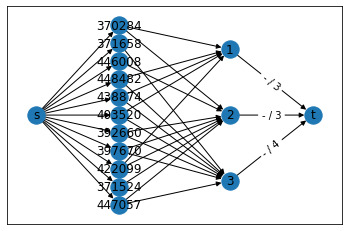

In [104]:
# 1. create a random or load a pregenerated problem instance
students, tutorials, _ = load_problem(1)

# 2. transform the problem into a bipartite graph representation
G = create_graph(students, tutorials)

# 3. visualize the graph
visualize_graph(students, tutorials, G)

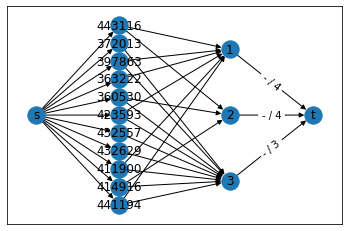

In [105]:
students, tutorials, _ = load_problem(2)
G = create_graph(students, tutorials)
visualize_graph(students, tutorials, G)

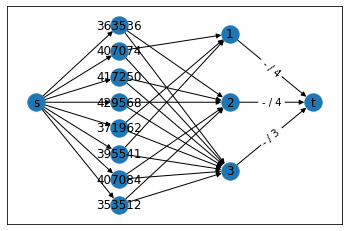

In [106]:
students, tutorials = generate_random_problem()
G = create_graph(students, tutorials)
visualize_graph(students, tutorials, G)

In [91]:
# unittests


In [92]:
# unittests


In [93]:
# unittests


## b) extract_assignments() - 4P.

Implementieren Sie die Funktion `extract_assignments()`. Diese Funktion erhält als Eingabe die zwei Dictionaries `students` und `tutorials`, sowie den augmentierten Graphen `R`, der den maximalen Fluss von `s` nach `t` beschreibt. `R` erhält man durch: 

```
R = edmonds_karp(G, "s", "t"),
```
wobei die Funktion `edmonds_karp()` aus dem Package `networkx` benutzt wird.

Die Funktion `G.edges(data=True)` gibt Ihnen eine Liste von Trippeln, die aus zwei Knoten und den Attributen der Kante bestehen. Sie können auf den berechneten Fluss über das Attribut `flow` zugreifen. Beachten Sie hierbei die Dokumentation von `networkx`, falls Sie Probleme haben auf das Attribut zuzugreifen.

Schreiben Sie alle Matrikelnummern, die einem Tutorium zugeordnet worden sind in das Dictionary `assignments`, wobei der Schlüssel die Nummer des Tutoriums beschreiben soll und der Werte eine Liste der zugeordneten Studenten darstellt.

Hinweis: Beachten Sie, dass wir nur an dem positiven Fluss entlang der Kanten von der Quelle `s` zur Senke `t` interessiert sind. Machen Sie sich mit der Funktion `edmonds_karp` aus dem Package `networkx` vertraut, um den augmentierten Graphen `R` richtig zu deuten.

```
Eingabe:
siehe Beispiel aus `create_graph()`

Ausgabe:

> print_assignment():
Zugeordnet: 8 / 8
Tutorium 1: #Studenten 1/3 - Matrikelnummer: [371115]
Tutorium 2: #Studenten 4/4 - Matrikelnummer: [366649, 364269, 374654, 435633]
Tutorium 3: #Studenten 3/3 - Matrikelnummer: [430649, 419292, 427148]
Nicht zugeordnet: []

> visualize_graph():
```
![extract_assignemnts_example](img/extract_assignments_example.png)

In [118]:
def extract_assignments(students, tutorials, R):
    assignments = {}
    
    # YOUR CODE HERE
    for student, tutorial, data in R.edges(data=True):
        if student == 's' or tutorial == 't':
            continue
        if data['flow'] > 0:
            assignments[tutorial] = assignments.get(tutorial, []) + [student]
    
    return assignments

## b) Tests

In [119]:
# unittests
def solve_bipartite_matching_problem(students, tutorials):
    # 1. transform the problem into a bipartite graph representation
    G = create_graph(students, tutorials)
    # 2. solve the problem using a max-flow solution
    R = edmonds_karp(G, "s", "t")
    # 3. extract the solution from the graph
    assignments = extract_assignments(students, tutorials, R)
    # 4. output the solution in a human readable form
    print_assignment(assignments, students, tutorials)
    # 5. optional: visualize the solution as a graph
    visualize_graph(students, tutorials, G, R)

Zugeordnet: 10 / 11
Tutorium 2: #Studenten 3/3 - Matrikelnummer: [447057, 371524, 446008]
Tutorium 1: #Studenten 3/3 - Matrikelnummer: [422099, 448482, 370284]
Tutorium 3: #Studenten 4/4 - Matrikelnummer: [397670, 392660, 403520, 438874]
Nicht zugeordnet: [371658]


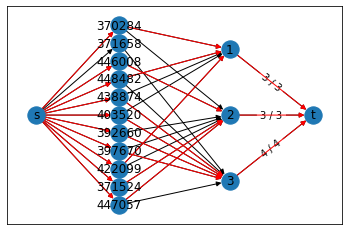

In [120]:
students, tutorials, _ = load_problem(1)
solve_bipartite_matching_problem(students, tutorials)

Zugeordnet: 10 / 11
Tutorium 1: #Studenten 4/4 - Matrikelnummer: [441194, 423593, 363222, 397863]
Tutorium 2: #Studenten 3/4 - Matrikelnummer: [414916, 360530, 443116]
Tutorium 3: #Studenten 3/3 - Matrikelnummer: [411900, 432629, 432557]
Nicht zugeordnet: [372013]


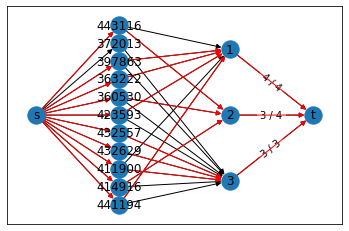

In [121]:
students, tutorials, _ = load_problem(2)
solve_bipartite_matching_problem(students, tutorials)

Zugeordnet: 8 / 8
Tutorium 3: #Studenten 3/3 - Matrikelnummer: [404407, 423441, 378818]
Tutorium 1: #Studenten 3/3 - Matrikelnummer: [377924, 384866, 396215]
Tutorium 2: #Studenten 2/4 - Matrikelnummer: [367694, 399178]
Nicht zugeordnet: []


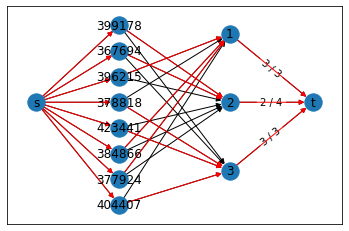

In [122]:
# create a random problem instance
students, tutorials = generate_random_problem()
solve_bipartite_matching_problem(students, tutorials)

Zugeordnet: 12 / 12
Tutorium 2: #Studenten 4/4 - Matrikelnummer: [381190, 414484, 419437, 354417]
Tutorium 3: #Studenten 2/2 - Matrikelnummer: [439550, 386663]
Tutorium 5: #Studenten 1/1 - Matrikelnummer: [433024]
Tutorium 4: #Studenten 4/4 - Matrikelnummer: [380455, 420241, 435910, 396648]
Tutorium 1: #Studenten 1/1 - Matrikelnummer: [443854]
Nicht zugeordnet: []


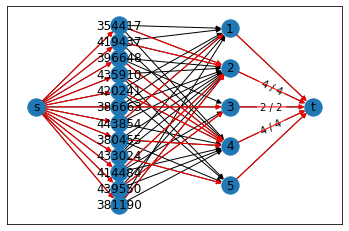

In [130]:
# create a random problem instance
students, tutorials = generate_random_problem(n_students=12, n_tutorials=5, n_prios=3, min_capacity=1, max_capacity=4)
solve_bipartite_matching_problem(students, tutorials)

In [124]:
# unittests

## Jupyter Notebook Stolperfalle
Bei der Benutzung von Jupyter Notebooks, wird der globale Zustand aller Variablen zwischen der Ausführung von verschiedenen Zellen erhalten. Dies ist auch der Fall, wenn Zellen gelöscht oder hinzugefügt werden.
Um sicher zu gehen, dass nicht ausversehen notwendige Variablen überschrieben oder gelöscht wurden, kann der Befehl `Kernel -> Restart & Run All` ausgeführt werden.